## Step 1: Import Libraries

We begin by importing the necessary libraries for data manipulation, visualization, and modeling.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

## Step 2: Load Dataset and data preprocessing

We load the dataset and parse the date column as datetime.
Set 'Date' as index, sort it, and optionally resample it to monthly totals.

In [10]:
# Load your dataset
df = pd.read_csv("salesForecasting_data.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set date as index
df.set_index('Date', inplace=True)

# Optional: Resample monthly if daily/weekly
df = df.resample('MS').sum()  # 'MS' = Month Start

# Show head
df.head()


,Sales
Date,
2020-01-01,1200
2020-02-01,1300
2020-03-01,1250
2020-04-01,1400
2020-05-01,1350


## Step 3: Visualize Sales Trend

We use line charts and moving averages to understand patterns in the data.

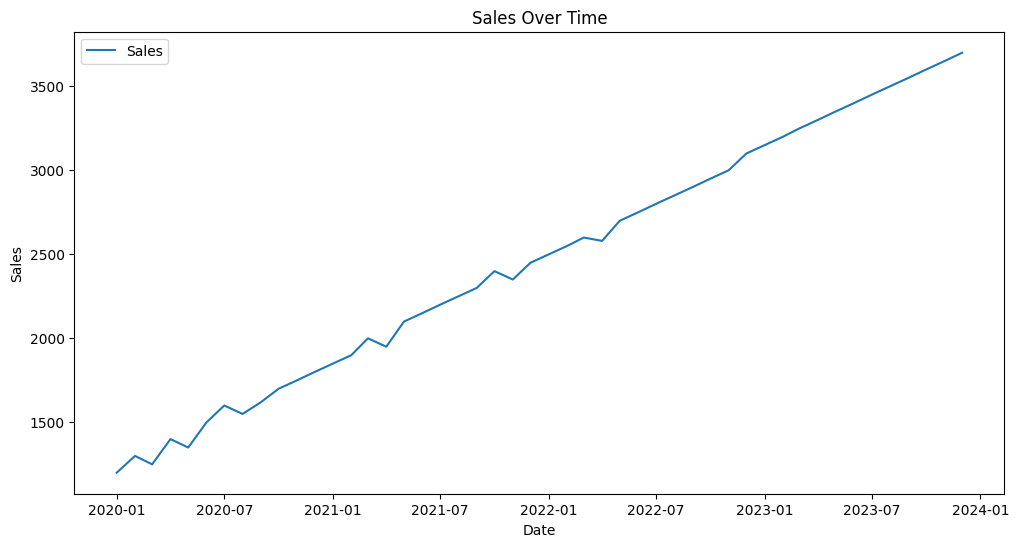

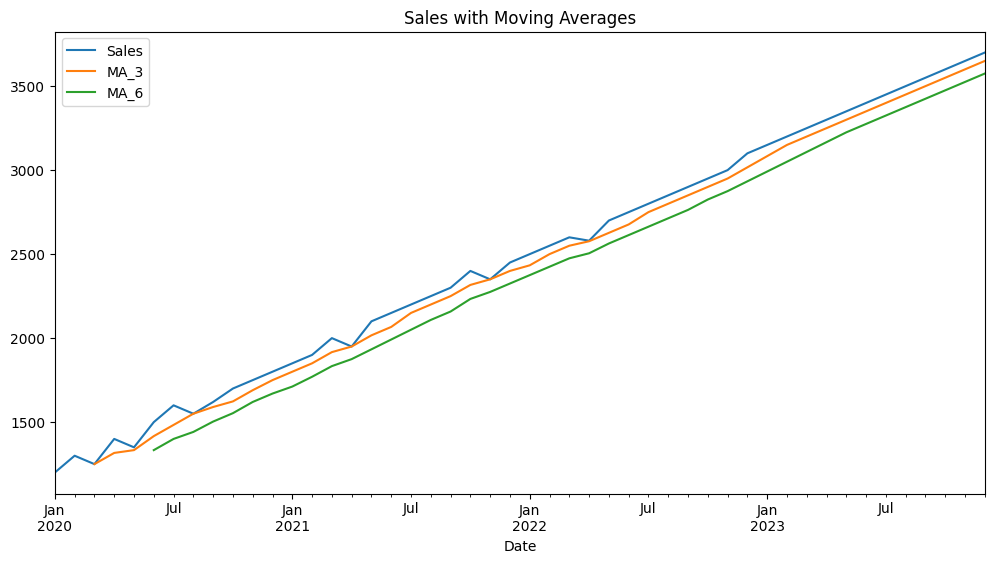

In [11]:
# Basic line plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Add moving averages
df['MA_3'] = df['Sales'].rolling(3).mean()
df['MA_6'] = df['Sales'].rolling(6).mean()

# Plot with moving averages
df[['Sales', 'MA_3', 'MA_6']].plot(figsize=(12, 6), title='Sales with Moving Averages')
plt.show()


## Step 4: Split Data into Train and Test

We'll use the last 12 months as test data to evaluate our forecast.

In [12]:
# Split: 80% training, 20% testing
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]


## Step 5: Train ARIMA Model

We fit the ARIMA model using training data. The order (p,d,q) may need tuning.

In [13]:
# ARIMA(p,d,q) order (you can tune this)
model = ARIMA(train['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Summary
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   38
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -201.927
Date:                Sun, 03 Aug 2025   AIC                            409.855
Time:                        18:52:01   BIC                            414.687
Sample:                    01-01-2020   HQIC                           411.558
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   2218.425      0.000       0.999       1.001
ma.L1         -0.9982      0.236     -4.226      0.000      -1.461      -0.535
sigma2      2935.9847   8.09e-05   3.63e+07      0.000    2935.985    2935.985
===================================================================================
Ljung-Box (L1) (Q):                  15.79   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.00   Prob(JB):                         0.87
Heteroskedasticity (H):               0.21   Skew:                            -0.21
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.89e+22. Standard errors may be unstable.
"""

## Step 6: Forecast and Compare with Actuals

We forecast for 12 months and compare against the test set.

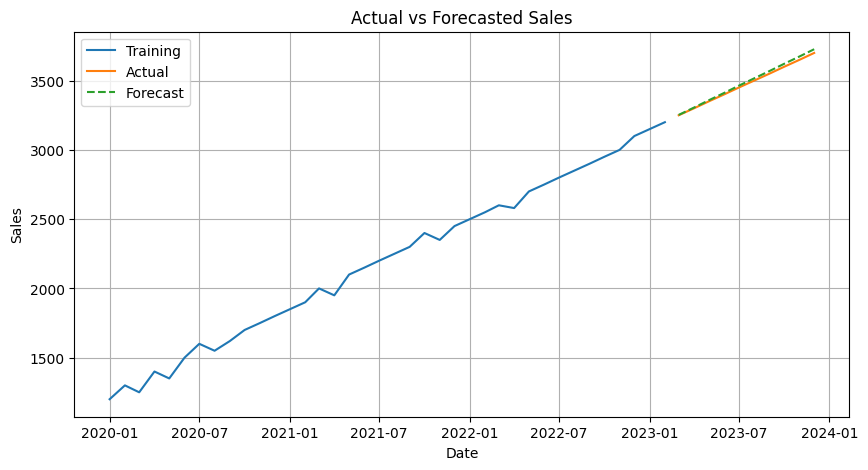

In [14]:
# Forecast for test period
forecast = model_fit.forecast(steps=len(test))

# Convert to Series with correct index
forecast = pd.Series(forecast, index=test.index)

# Plot forecast vs actual
plt.figure(figsize=(10, 5))
plt.plot(train['Sales'], label='Training')
plt.plot(test['Sales'], label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


## Step :7 Evaluate Forecast

We use RMSE and MAPE to evaluate the performance of our forecast.

In [15]:
# Convert to arrays for sklearn
y_true = test['Sales'].to_numpy()
y_pred = forecast.to_numpy()

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2%}')


RMSE: 16.62
MAPE: 0.42%


## Step 8: Save Forecast to CSV

Save the forecasted results to a CSV file.

In [16]:
forecast.to_csv('forecasted_sales.csv', header=['Forecasted Sales'])